In [327]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Data Understanding and Data loading 
## Target Variable is cnt 
## drop casual and registered 
## map original Values  -> S
## EDA on data 
## Univariate Analysis 
## Bivariate Analysis 
## Multivariate Analysis 
## Create dummy variables where category is>2 
------------------------------------------
Master Dataset --70,30 split 
Feature Selection --> RFE --> Automatic ,Manual ( p-value and VIF ) 

1. High p-value, High VIF - Drop the column 
2. High - Low High p value, Low VIF - remove the High p- value first , 
  because by removing the high value the VIF of the other variables will vary ( anything above 0.5 is high) 
  Low p value, High VIF - remove these after the above one. ( above 5 is high) 
3. Low P-value , Low VIF - Keep the column

In [328]:
df = pd.read_csv('day.csv')

In [329]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [330]:
df.drop(columns=['casual','registered'],inplace=True)

In [331]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [332]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [333]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [334]:
df['season'] = df['season'].map(lambda x: {1:'spring',2:'summer',3:'fall',4:'winter'}.get(x))
df['weathersit'] = df['weathersit'].map(lambda x: {1:'clear',2:'cloudy',3:'rainy',4:'thunderstorm'}.get(x))

In [335]:
df['mnth'] = df['mnth'].map(lambda x: {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                                      7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}.get(x))

In [336]:
df['weekday'] = df['weekday'].map(lambda x: {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}.get(x))

In [337]:
df['yr'] = df['yr'].apply(lambda x : '2018' if x==0 else '2019')

# Visualization of Cycle Demand vs various other independent variables 
 
     1. Above average temperatures gathered higher the demand for cycles.
     2. Medium windspeeds or below average wind speed gathered more demand for cycles
     3. Above average humidity gathered more demand for cycles

<Figure size 3000x1000 with 0 Axes>

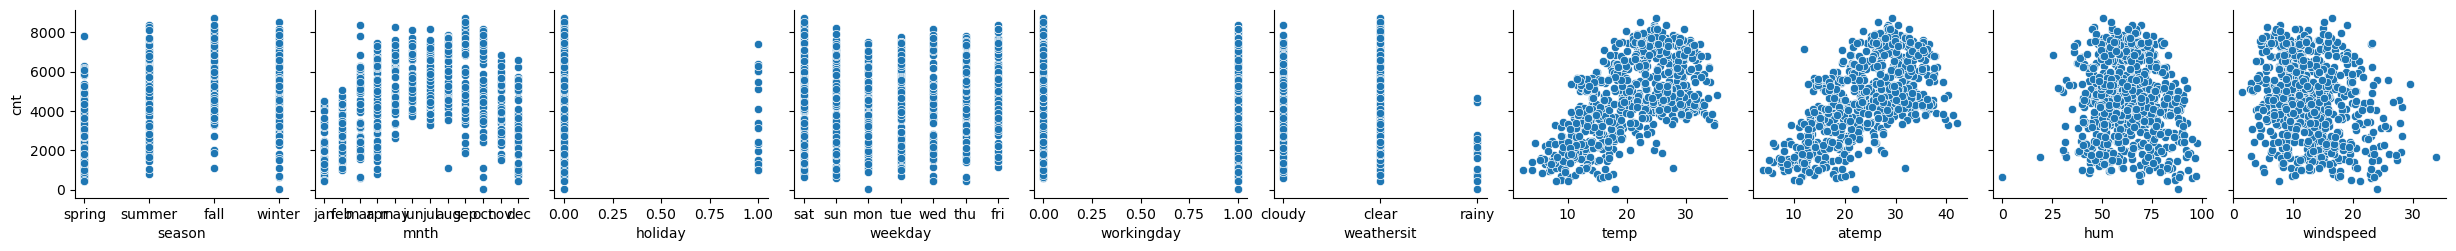

In [338]:
plt.figure(figsize=(30,10))
sns.pairplot(df,x_vars=['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

# EDA Univariate, BiVariate and Multivariate Analysis and Observations 

    1.  May to October has higher average Demand for cycles
    2.  On an average more usage was there on working days compared to holidays( considering 1 is a holiday in that column) 
    3.  Average demand for cycles remained Higher demand for cycles in Summar and Fall
    4.  Clear Skies showed more demand compared to rainy Days 
    3.  Irrespective of season , rainy days saw less demand compared to clear/cloudy skies
    4.  Weekdays 4& 5 Saw more demand for cycles consistently  during Spring 
    5.  During Summer the avrage demand for cycles is almost similar on most of the weekdays 
    6.  During Fall WeekDay2 saw more Avrage Demand for cycles compared to any other day 
    7.  Average temperature is around 25 for most of the year

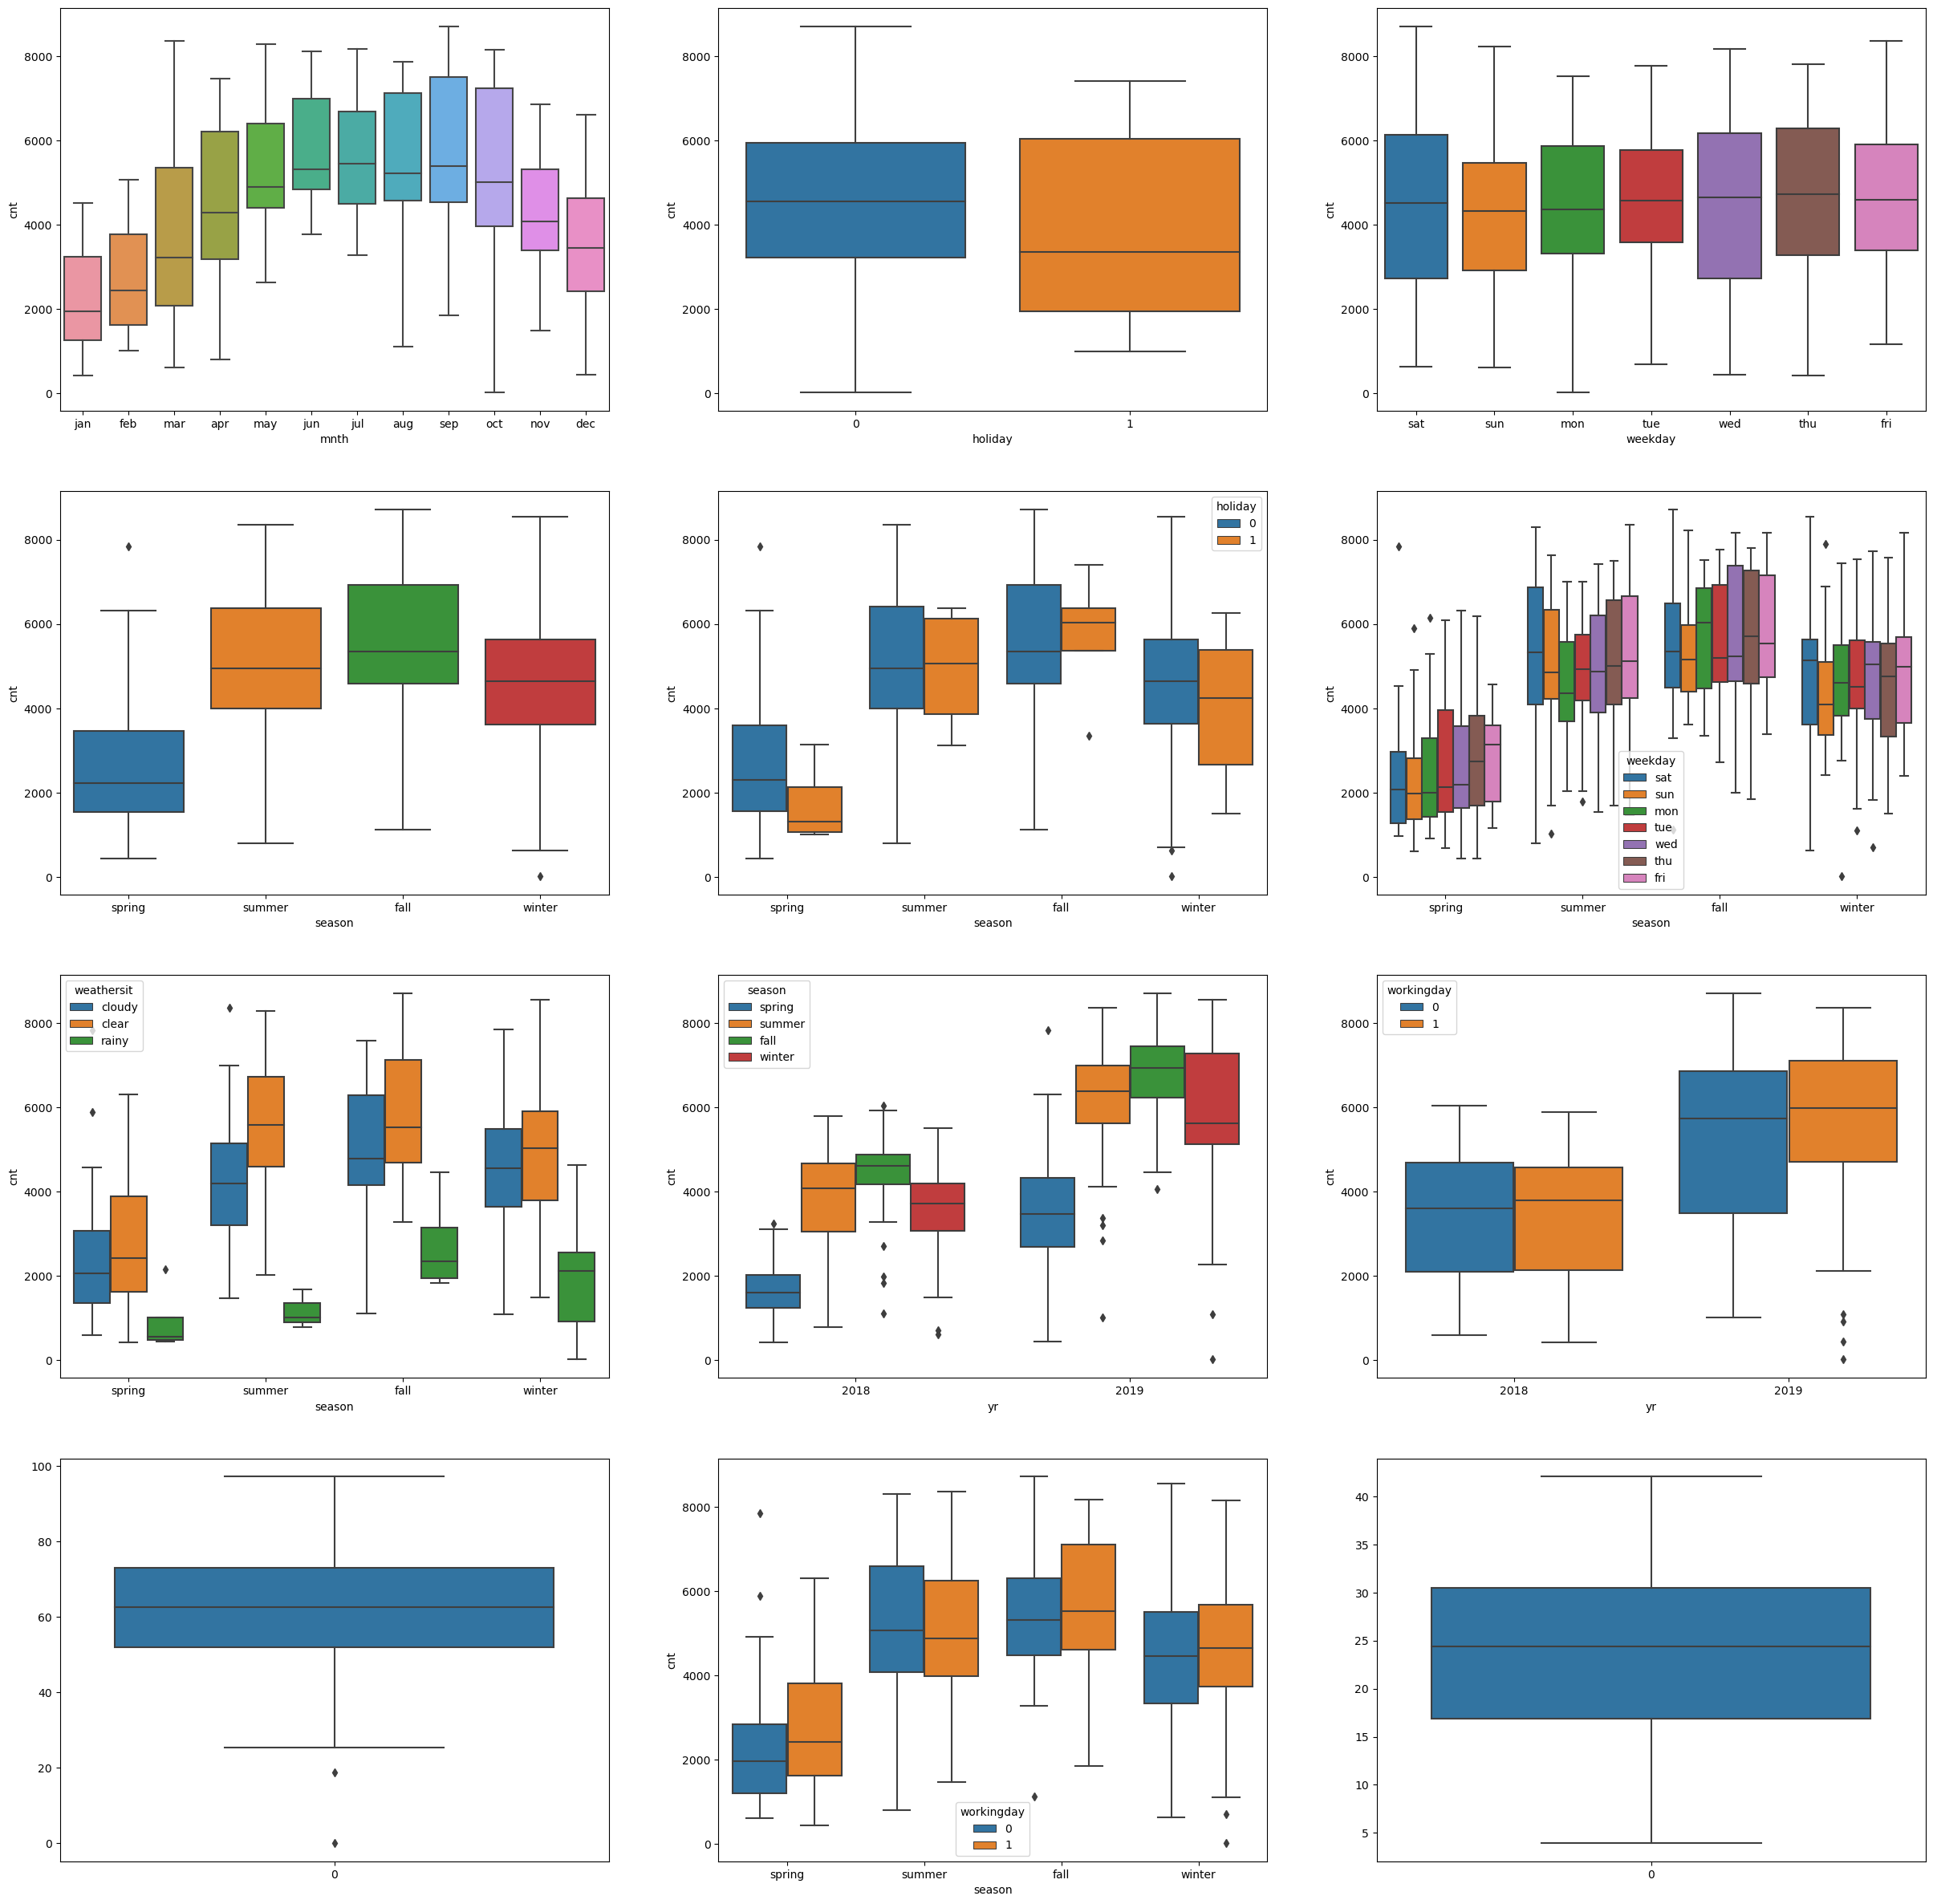

In [339]:
plt.figure(figsize=(30,30))
plt.subplot(4,3,1)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(4,3,2)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(4,3,3)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(4,3,4)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(4,3,5)
sns.boxplot(x='season',y='cnt',hue='holiday',data=df)
plt.subplot(4,3,6)
sns.boxplot(x='season',y='cnt',hue='weekday',data=df)
plt.subplot(4,3,7)
sns.boxplot(x='season',y='cnt',hue='weathersit',data=df)
plt.subplot(4,3,8)
sns.boxplot(x='yr',y='cnt',hue='season',data=df)
plt.subplot(4,3,9)
sns.boxplot(x='yr',y='cnt',hue='workingday',data=df)
plt.subplot(4,3,12)
sns.boxplot(df['atemp'])
plt.subplot(4,3,10)
sns.boxplot(df['hum'])
plt.subplot(4,3,11)
sns.boxplot(x='season',y='cnt',hue='workingday',data=df)
plt.show()

In [340]:
num_cols = ['temp','atemp','hum','windspeed','cnt']
cat_cols = ['season','mnth','yr','holiday','weekday','workingday','weathersit']
extra_cols = ['instant','dteday']

In [341]:
df[num_cols].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


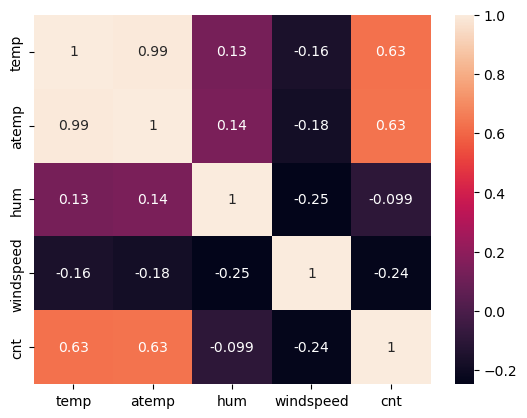

In [342]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

In [343]:
# From Above we can understand that temp and atemp are corelated in the same way with cnt 
# so we can consider this as one of the items for multicolinerity 

# Data Preparation for Linear Regression using RFE

In [344]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [345]:
# 1. multiple categorical --> season,mnth,weekday, weathersit --> Use dummy variables
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [346]:
season = pd.get_dummies(df['season'],drop_first=True,dtype=int)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [347]:
mnth = pd.get_dummies(df['mnth'],drop_first=True,dtype=int)
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [348]:
weekday = pd.get_dummies(df['weekday'],drop_first=True,dtype=int)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [349]:
weathersit = pd.get_dummies(df['weathersit'],drop_first=True,dtype=int)
weathersit.head()

,cloudy,rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [350]:
cycling = pd.concat([df,season,mnth,weekday,weathersit],axis=1)

In [351]:
cycling.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [352]:
cycling.yr = cycling.yr.apply(lambda x : 0 if x=='2018' else 1)

In [353]:
#dropping this column as dteday is providing similar information as yr,mnth 
# and I believe it will not have an impact in predicting the linear regression model

#  underlying assumptions being that 
#    1. Date doesnt repeat (considering Yr,month and day combination) 



cycling.drop(columns=['dteday'],inplace=True)

In [354]:
cycling.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,1,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,1,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


# Split Data into Training and Testing Sets 

In [355]:
df_train,df_test = train_test_split(cycling,train_size=0.7,test_size=0.3,random_state=100)

In [356]:
# Rescaling the Features 
   # 1. Apply scaler to all the columns except yes/no and 'dummy' variables
num_cols = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [357]:
df_train.drop(columns=['instant'],inplace=True)

In [358]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='workingday', ylabel='Density'>

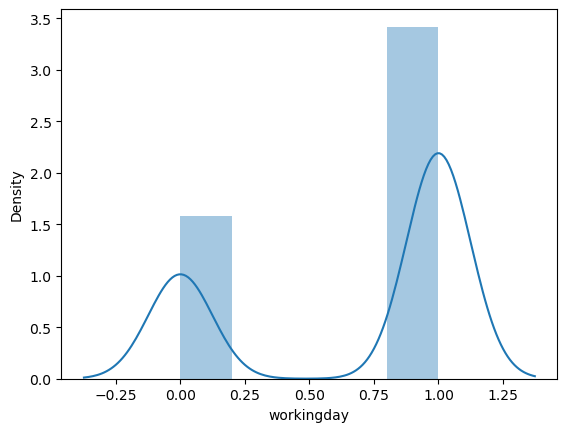

In [417]:
sns.distplot(df.workingday)

# Dividing into X and Y sets for MODEL building 

In [359]:
y_train = df_train.pop('cnt')
x_train = df_train

# Building our Model now 

In [360]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [361]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(estimator=lm,n_features_to_select=30) # running rfe 
rfe = rfe.fit(x_train,y_train)

In [362]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', True, 1),
 ('tue', True, 1),
 ('wed', True, 1),
 ('cloudy', True, 1),
 ('rainy', True, 1)]

# Buiilding model using statsmodel for the detailed statistics 

In [363]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'cloudy', 'rainy'],
      dtype='object')

In [364]:
x_train_rfe = x_train[col]

In [365]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [366]:
x_train_rfe.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,1,0,0,0,0,1,0


In [367]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [368]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.42e-181
Time:                        10:40:26   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.0

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
24,sun,inf
23,sat,inf
4,temp,67.12
5,atemp,56.09
8,spring,10.80
10,winter,9.52
9,summer,8.31
19,nov,6.80


In [370]:
x_tran_new = x_train_rfe.drop(['holiday'],axis=1)
#x_tran_new = x_train_rfe.drop(['mar','jun','atemp','oct','wed','holiday','thu','aug','tue','mon','may','feb','sun'],axis=1)

In [371]:
lm = sm.OLS(y_train,x_tran_new).fit()

In [372]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.42e-181
Time:                        10:40:26   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.052      4.911      0.0

In [373]:
# Calculate the VIFs for the new model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features     VIF
0        const  176.91
3         temp   67.12
4        atemp   56.09
7       spring   10.80
2   workingday   10.15
9       winter    9.52
8       summer    8.31
22         sat    7.82
23         sun    7.36
18         nov    6.80
19         oct    6.59
10         aug    6.54
13         jan    5.90
14         jul    5.70
11         dec    5.68
20         sep    4.96
12         feb    4.39
16         mar    3.47
15         jun    2.88
17         may    2.24
5          hum    2.05
21         mon    1.98
26         wed    1.94
24         thu    1.83
25         tue    1.80
27      cloudy    1.60
6    windspeed    1.30
28       rainy    1.30
1           yr    1.06


In [374]:
x_tran_new = x_train_rfe.drop(['holiday','atemp'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.74e-182
Time:                        10:40:26   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2550      0.052      4.904      0.0

In [375]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features     VIF
0        const  176.53
6       spring   10.79
2   workingday   10.10
8       winter    9.50
7       summer    8.29
21         sat    7.75
22         sun    7.30
3         temp    7.12
17         nov    6.80
18         oct    6.59
9          aug    6.43
12         jan    5.90
10         dec    5.68
13         jul    5.66
19         sep    4.94
11         feb    4.39
15         mar    3.47
14         jun    2.83
16         may    2.22
4          hum    2.05
20         mon    1.96
25         wed    1.93
23         thu    1.81
24         tue    1.79
26      cloudy    1.60
27       rainy    1.29
5    windspeed    1.24
1           yr    1.06


In [376]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.99e-182
Time:                        10:40:26   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2247      0.049      4.629      0.0

In [377]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features     VIF
0        const  153.32
2   workingday   10.09
20         sat    7.75
21         sun    7.30
3         temp    7.01
16         nov    6.79
17         oct    6.59
7       winter    6.08
9          dec    5.64
11         jan    5.23
8          aug    5.11
6       summer    4.73
12         jul    4.65
18         sep    4.23
10         feb    3.84
14         mar    3.12
13         jun    2.74
15         may    2.22
4          hum    2.05
19         mon    1.96
24         wed    1.93
22         thu    1.81
23         tue    1.79
25      cloudy    1.60
26       rainy    1.29
5    windspeed    1.23
1           yr    1.06


In [378]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.86e-183
Time:                        10:40:27   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.046      4.993      0.0

In [379]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features     VIF
0        const  136.15
2   workingday   10.06
19         sat    7.73
20         sun    7.28
3         temp    7.00
7       winter    3.81
11         jan    3.69
8          aug    3.59
12         jul    3.44
6       summer    3.26
10         feb    2.68
13         jun    2.35
17         sep    2.32
14         mar    2.18
15         may    2.05
9          dec    2.04
4          hum    2.02
18         mon    1.96
23         wed    1.93
16         nov    1.92
21         thu    1.81
22         tue    1.79
24      cloudy    1.60
25       rainy    1.29
5    windspeed    1.23
1           yr    1.06


In [380]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.60e-184
Time:                        10:40:27   Log-Likelihood:                 525.97
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -896.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2564      0.037      6.874      0.0

In [381]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  90.64
3         temp   6.96
7       winter   3.79
11         jan   3.69
8          aug   3.58
12         jul   3.42
6       summer   3.26
10         feb   2.68
2   workingday   2.57
13         jun   2.34
17         sep   2.32
14         mar   2.18
15         may   2.04
9          dec   2.04
4          hum   2.01
16         nov   1.90
22         wed   1.82
19         sat   1.69
21         tue   1.69
20         thu   1.68
23      cloudy   1.60
18         mon   1.59
24       rainy   1.28
5    windspeed   1.23
1           yr   1.05


In [382]:
#Drop ones with High P and low Vif 

x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.21e-185
Time:                        10:40:27   Log-Likelihood:                 525.95
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.037      6.880      0.0

In [383]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  90.64
3         temp   5.02
11         jan   3.69
7       winter   3.42
6       summer   3.25
10         feb   2.66
2   workingday   2.57
8          aug   2.35
12         jul   2.21
13         mar   2.04
9          dec   2.03
4          hum   1.98
15         nov   1.90
21         wed   1.82
16         sep   1.77
18         sat   1.69
20         tue   1.69
19         thu   1.68
17         mon   1.59
22      cloudy   1.59
14         may   1.54
23       rainy   1.28
5    windspeed   1.21
1           yr   1.04


In [384]:
#Drop ones with High P and low Vif 

x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.62e-186
Time:                        10:40:27   Log-Likelihood:                 525.71
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -908.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2567      0.037      6.894      0.0

In [385]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  90.62
3         temp   5.02
11         jan   3.69
7       winter   3.42
6       summer   3.25
10         feb   2.66
8          aug   2.35
12         jul   2.21
13         mar   2.04
9          dec   2.03
4          hum   1.98
2   workingday   1.93
15         nov   1.89
16         sep   1.77
18         sat   1.68
21      cloudy   1.59
14         may   1.54
22       rainy   1.28
20         tue   1.26
19         thu   1.25
5    windspeed   1.21
17         mon   1.21
1           yr   1.04


In [386]:
#Drop ones with High P and low Vif 

x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.85e-187
Time:                        10:40:27   Log-Likelihood:                 525.49
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -913.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2564      0.037      6.890      0.0

In [387]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  90.60
3         temp   5.01
11         jan   3.68
7       winter   3.42
6       summer   3.25
10         feb   2.66
8          aug   2.35
12         jul   2.20
9          dec   2.03
13         mar   2.03
4          hum   1.97
15         nov   1.87
2   workingday   1.79
16         sep   1.77
18         sat   1.68
20      cloudy   1.58
14         may   1.54
21       rainy   1.28
5    windspeed   1.21
19         tue   1.15
17         mon   1.11
1           yr   1.04


In [388]:
#Drop ones with High P and low Vif 

x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu','mar'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.60e-188
Time:                        10:40:27   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.033      7.372      0.0

In [389]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  70.67
3         temp   3.97
6       summer   2.80
7       winter   2.63
11         jan   2.31
8          aug   2.15
12         jul   2.10
4          hum   1.96
10         feb   1.78
2   workingday   1.78
14         nov   1.75
17         sat   1.67
9          dec   1.66
15         sep   1.59
19      cloudy   1.58
13         may   1.51
20       rainy   1.28
5    windspeed   1.21
18         tue   1.15
16         mon   1.11
1           yr   1.04


In [390]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu','mar','jul'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.96e-189
Time:                        10:40:27   Log-Likelihood:                 524.86
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2425      0.033      7.386      0.0

In [391]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  70.66
3         temp   3.00
7       winter   2.39
11         jan   2.30
6       summer   2.28
4          hum   1.95
2   workingday   1.78
10         feb   1.76
13         nov   1.74
16         sat   1.67
9          dec   1.65
18      cloudy   1.58
12         may   1.50
8          aug   1.48
14         sep   1.27
19       rainy   1.27
5    windspeed   1.20
17         tue   1.15
15         mon   1.11
1           yr   1.04


In [392]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu','mar','jul','tue'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.05e-189
Time:                        10:40:27   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.033      7.415      0.0

In [393]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  70.61
3         temp   3.00
7       winter   2.39
11         jan   2.30
6       summer   2.28
4          hum   1.95
10         feb   1.76
13         nov   1.74
2   workingday   1.67
16         sat   1.67
9          dec   1.65
17      cloudy   1.58
12         may   1.50
8          aug   1.48
14         sep   1.27
18       rainy   1.27
5    windspeed   1.20
15         mon   1.05
1           yr   1.04


In [394]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu','mar','jul','tue','may'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.00e-190
Time:                        10:40:27   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2365      0.032      7.287      0.0

In [395]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  68.83
3         temp   2.96
7       winter   2.39
11         jan   2.29
4          hum   1.91
6       summer   1.84
10         feb   1.75
12         nov   1.74
2   workingday   1.67
15         sat   1.67
9          dec   1.65
16      cloudy   1.58
8          aug   1.47
13         sep   1.27
17       rainy   1.26
5    windspeed   1.20
14         mon   1.05
1           yr   1.04


In [396]:
x_tran_new = x_train_rfe.drop(['holiday','atemp','spring','oct','sun','jun','wed','thu','mar','jul','tue','may','mon'],axis=1)
lm = sm.OLS(y_train,x_tran_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.58e-191
Time:                        10:40:27   Log-Likelihood:                 521.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -937.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.033      7.247      0.0

In [397]:
vif = pd.DataFrame()
X = x_tran_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
0        const  68.81
3         temp   2.96
7       winter   2.38
11         jan   2.29
4          hum   1.91
6       summer   1.84
10         feb   1.75
12         nov   1.74
2   workingday   1.66
14         sat   1.66
9          dec   1.65
15      cloudy   1.58
8          aug   1.47
13         sep   1.27
16       rainy   1.26
5    windspeed   1.20
1           yr   1.03


In [398]:
#Vif and p value are low now. 

In [399]:
len(x_tran_new.columns)

17

# Residual Analysis

In [400]:
y_train_pred = lm.predict(x_tran_new)

<Axes: ylabel='Density'>

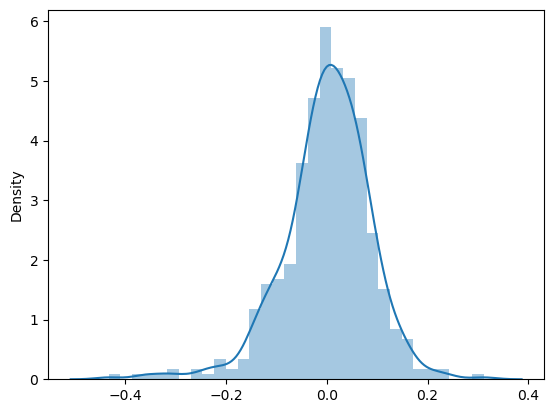

In [401]:
res = y_train - y_train_pred
sns.distplot(res)

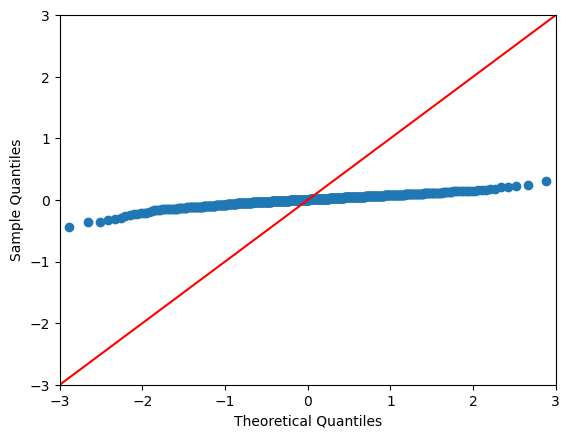

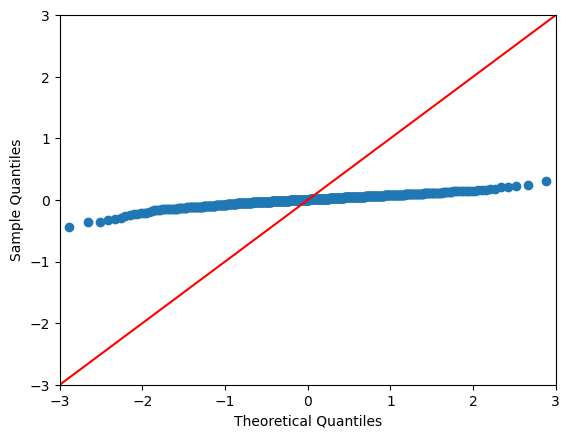

In [402]:
sm.qqplot(res,line='45')

# Predictions and Evaluation on the Test set

In [403]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,213.665198,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,4.000000,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.000000,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,537.500000,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [404]:
df_test.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
184,185,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,...,0,0,1,0,0,0,0,0,1,0
535,536,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,...,0,0,0,0,0,0,0,1,0,0
299,300,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,...,1,0,0,0,0,1,0,0,1,0
221,222,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,...,0,0,0,0,0,0,0,1,0,0
152,153,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,...,0,0,0,0,0,1,0,0,0,0


In [405]:
num_cols = ['temp','atemp','hum','windspeed','cnt']
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [406]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,213.665198,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,4.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,537.500000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [407]:
df_test.drop(columns=['instant'],inplace=True)

In [408]:
y_test = df_test.pop('cnt')
x_test = df_test                     

In [409]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,rainy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


In [410]:
x_test_sm = x_test_sm.drop(columns=['holiday','atemp','spring','oct','sun','jun','wed','thu','mar','jul','tue','may','mon'],axis=1)

In [411]:
y_test_pred = lm.predict(x_test_sm)

In [412]:
from sklearn.metrics import r2_score

In [413]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.817825673328213

In [415]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.58e-191
Time:                        10:54:00   Log-Likelihood:                 521.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -937.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.033      7.247      0.000       0.172       0.299
yr             0.2307      0.008     28.956      0.000       0.215       0.246
workingday     0.0516      0.011      4.788      0.000       0.030       0.073
temp           0.4665      0.030     15.625      0.000       0.408       0.525
hum           -0.1484      0.037     -3.994      0.000      -0.221      -0.075
windspeed     -0.1912      0.025     -7.551      0.000      -0.241      -0.141
summer         0.0819      0.012      6.630      0.000       0.058       0.106
winter         0.1445      0.014     10.332      0.000       0.117       0.172
aug            0.0467      0.016      2.897      0.004       0.015       0.078
dec           -0.0482      0.018     -2.665      0.008      -0.084      -0.013
feb           -0.0416      0.021     -2.004      0.046      -0.082      -0.001
jan           -0.0708      0.021     -3.388      0.001      -0.112      -0.030
nov           -0.0456      0.018     -2.479      0.014      -0.082      -0.009
sep            0.1040      0.016      6.403      0.000       0.072       0.136
sat            0.0602      0.014      4.321      0.000       0.033       0.088
cloudy        -0.0598      0.010     -5.772      0.000      -0.080      -0.039
rainy         -0.2549      0.026     -9.781      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       84.109   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.847
Skew:                          -0.813   Prob(JB):                     9.08e-50
Kurtosis:                       5.826   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""